In [ ]:
!pip install konlpy
!pip install wordcloud

In [ ]:
# 한글폰트 설정 -> 실행후 런타임 다시시작 필요
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
from konlpy.tag import Twitter 
from collections import Counter

In [ ]:
# import pandas as pd
# df = pd.io.parsers.read_csv("data/starbucks_review.csv")
# sliceData1 = df.loc[:, '감정']    # '감정' 열만 자름
# sliceData2 = df.loc[:, '리뷰']   # '리뷰' 열만 자름
# sliceData = pd.concat([sliceData1,sliceData2],axis=1)

# sliceData.to_csv('data/new_starbucks_review.csv', index=False)    # csv로 저장

# new_starbucks_review = pd.io.parsers.read_csv('data/new_starbucks_review.csv')

In [ ]:
# # DataFrame 이나 Serises 를 txt 파일로 깔끔하게 바꿀경우 (이건 tsv)
# new_starbucks_review.to_csv('data/new_starbucks_review.txt', index=False, header=None, sep="\t")

In [ ]:
# # txt파일 열기
# f = open('drive/MyDrive/dataset/starbucks_good_review.txt', 'r')
# while True:
#     lists = f.readline()
#     if not list: break
#     print(lists)
# f.close()

In [ ]:
%cd /content/drive/MyDrive/sentiment

/content/drive/MyDrive/sentiment


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
pred_1 = pd.read_csv('bert_pred_labels_final.csv')

In [ ]:
pred_1.head()

,매장,시간,별점,리뷰,싸이트,감정,pred
0,스타벅스 역삼아레나빌딩점,2021-03-27,5.0,넓고 깻끗해서좋아요,1,좋음,좋음
1,스타벅스 역삼아레나빌딩점,2021-03-24,5.0,쾌적해요 집근처 스벅 중 최애,1,좋음,좋음
2,스타벅스 역삼아레나빌딩점,2021-03-23,5.0,좋아요,1,좋음,좋음
3,스타벅스 역삼아레나빌딩점,2021-03-22,5.0,맛나요,1,좋음,좋음
4,스타벅스 역삼아레나빌딩점,2021-03-19,4.0,괜찮아요!,1,좋음,좋음


In [ ]:
pred_1.shape

(179216, 7)

In [ ]:
pred_1.drop(['시간',	'별점', '싸이트',	'감정'], axis=1, inplace=True)

In [ ]:
pred_good = pred_1[pred_1['pred']=='좋음']

In [ ]:
pred_good.head()

,매장,리뷰,pred
0,스타벅스 역삼아레나빌딩점,넓고 깻끗해서좋아요,좋음
1,스타벅스 역삼아레나빌딩점,쾌적해요 집근처 스벅 중 최애,좋음
2,스타벅스 역삼아레나빌딩점,좋아요,좋음
3,스타벅스 역삼아레나빌딩점,맛나요,좋음
4,스타벅스 역삼아레나빌딩점,괜찮아요!,좋음


In [ ]:
pred_good.shape

(159225, 3)

In [ ]:
from konlpy.tag import Okt
from collections import Counter
import pandas as pd

In [ ]:
pred_good_reviews = pred_good['리뷰'].values.tolist()

In [ ]:
pred_good_reviews

['넓고 깻끗해서좋아요',
 '쾌적해요 집근처 스벅 중 최애',
 '좋아요',
 '맛나요',
 '괜찮아요!',
 '좋아요!!',
 '좋아요',
 '좋아요',
 '좋아요',
 '좋아요',
 '좋아유',
 '카페는 역시 스타벅스죠',
 '매장 깨끗하고 좋아요',
 '좋아요',
 '좋아요ㅎㅎ',
 '좋아요!',
 '좋아유',
 '좋아용',
 '와',
 '굿',
 '굿',
 '진한향 아메리카노',
 '좋아요',
 '맛남ㅎㅎ',
 '세상친절해요',
 '텀블러 잘 샀어요',
 '굿',
 '직원들이 친절하고 커피맛도 괜찮아요',
 '저아',
 '굿',
 '맛있어요! 잘 먹겠습니다!!',
 '첫번째방문이에요',
 '라떼 맛이 soso',
 '조아요',
 '스타벅스는 돌체콜드브루!',
 '굿',
 '친절해요',
 '친절해요 ㅎ',
 '존맛',
 '매장 넓고 좋아요',
 '좋아요',
 '친절해요',
 '손이 빨라서 자주와요 넘 좋습니다',
 '굿',
 '깨끗하고 친절해요',
 '신메뉴 추천해줘서 마셨어요 적당히 달달하니 전 맛있었어요 다음에도 다시 마셔야겠어요',
 '굿',
 '편리해요',
 '굿',
 '좋아요',
 '스벅 좋아요',
 '친절해요 매장도 넓고',
 '집에서 가까워서 좋아요',
 '스타벅스는 진리!!',
 '쿠폰 적용변경 친절해게 잘해주셔서 좋았어요',
 '파트너분들이 손이 빠른 편입니다. 자주갑니다',
 '굿',
 '프리컨시 다모아서 다리어리 받아와써용 매장 직원분들 너무 친절하시고 좋아요',
 '친절해요',
 '굿',
 '굿',
 '역 가까이에 있어서 좋아요!',
 '좋아요',
 '스벅 다이어리 받은날',
 '친절하게 응다해 주셨어요 서비스 감사합니다',
 '조아요 맛이 있어요',
 '매장 넓고 직원분들 친절하세요',
 '깔끔',
 '좋아요',
 '굿',
 '이용하기 편리해서 좋습니다.',
 '좋아요',
 '가깝고 좋아요',
 '점심시간에 베이커리 종류가 너므 빨리 떨어져요 ㅠㅠ',
 '늘 청결하고 친절합니다',
 '조용해요',
 '스벅커피 굳!',
 '굿',

In [ ]:
okt = Okt()
pos_lists = [] 

for sentence in pred_good_reviews: 
  pos_lists.append(okt.pos(sentence)) 
  
# print(pos_lists)

In [ ]:
all_lists = [] 

for sentence in pos_lists: 
  for word, tag in sentence : 
   if tag in ['Noun', 'Adjective', 'Verb'] and ("것" not in word) and ("내" not in word) and ("나" not in word)and ("수"not in word) and ("게"not in word) and ("말"not in word):

        all_lists.append(word)
        
# print(all_lists)

In [ ]:
count = Counter(all_lists)

all_words = dict(count.most_common())

all_words

{'좋아요': 49751,
 '굿': 16971,
 '맛있어요': 10480,
 '친절해요': 8829,
 '직원': 6609,
 '맛': 6587,
 '커피': 6518,
 '친절하고': 6413,
 '스타벅스': 5956,
 '스벅': 5733,
 '매장': 5083,
 '사람': 4437,
 '넓고': 3951,
 '자주': 3736,
 '항상': 3301,
 '곳': 3211,
 '굳': 3035,
 '조아요': 2767,
 '요': 2548,
 '친절': 2534,
 '음료': 2456,
 '라떼': 2382,
 '좋습니다': 2066,
 '굿굿': 2058,
 '친절하세요': 2046,
 '분위기': 1887,
 '역시': 1816,
 '친절합니다': 1809,
 '자리': 1768,
 '입니다': 1735,
 '좋아용': 1707,
 '이용': 1632,
 '잘': 1614,
 '최고': 1586,
 '많아요': 1569,
 '늘': 1459,
 '친절하시고': 1441,
 '좋네요': 1437,
 '깨끗하고': 1197,
 '넘': 1197,
 '깔끔하고': 1193,
 '방문': 1183,
 '좋은': 1160,
 '맛있고': 1149,
 '좋았어요': 1143,
 '층': 1138,
 '가는': 1137,
 '있어서': 1076,
 '좋음': 1076,
 '좋고': 1017,
 '친절한': 994,
 '합니다': 989,
 '넓어서': 976,
 '아메리카노': 971,
 '파트너': 966,
 '근처': 952,
 '감사합니다': 947,
 '티': 936,
 '때': 928,
 '친절해서': 899,
 '하기': 884,
 '주문': 873,
 '조용하고': 862,
 '돌체': 857,
 '하는': 852,
 '메뉴': 841,
 '가요': 775,
 '추천': 741,
 '쾌적하고': 727,
 '점': 724,
 '위치': 722,
 '갑니다': 720,
 '공간': 720,
 '서비스': 711,
 '오늘': 705,
 '좋아여':

In [ ]:
token = {
 '좋아요': 49751,
 '굿': 16971,
 '맛있어요': 10480,
 '친절해요': 8829,
 '직원': 6609,
 '맛': 6587,
 '커피': 6518,
 '친절하고': 6413,
 '넓고': 3951,
 '굳': 3035,
 '잘': 1614,
 '최고': 1586,
 '많아요': 1569,
 '늘': 1459,
 '친절하시고': 1441,
 '깨끗하고': 1197,
 '맛있고': 1149,
 '좋았어요': 1143,
 '감사합니다': 947,
 '조용하고': 862,
 '추천': 741,
 '쾌적하고': 727,
 '위치': 722,
 '공간': 720,
 '서비스': 711,
 '맛있는': 659,
 '기분': 638,
 '괜찮아요': 601,
 '짱': 584,
 '가까워서': 573,
 '빠르고': 525,
 '많고': 522,
 '매우': 508,
 '새로': 503,
 '주차': 498,
 '좌석': 493,
 '거리': 491,
 '진짜': 470,
 '크고': 454,
 '달달': 452,
 '맛집': 450,
 '존맛': 448,
 '깔끔해요': 446,
 '맛있음': 439,
 '바로': 435,
 '좋았습니다': 433,
 '편해요': 427,
 '바닐라': 416,
 '허니': 416,
 '애용': 406,
 '완전': 385,
 '먹었어요': 382,
 '만족합니다': 376,
 '여유': 370,
 '케익': 364,
 '진리': 363,
 '맛있었어요': 352,
 '쿠폰': 350,
 '제일': 341,
 '사랑': 337,
 '종류': 323,
 '응대': 314,
 '슈크림': 313,
 '믿고': 287,
 '접근성': 282,
 '모두': 271,
 '많음': 270,
 '편하고': 267,
 '시원하고': 265,
 '조용해서': 261,
 '뷰': 252,
 '초콜릿': 251,
 '만족': 249,
 '인테리어': 246,
 '별다방': 245,
 '구매': 244,
 '굿굿굿': 238,
 '손님': 237,
 '향': 233,
 '선물': 231,
 '가깝고': 227,
 '쾌적': 220,
 '단골': 215,
 '가장': 207,
 '최애': 202,
 '따뜻한': 193,
 '친구': 189,
 '넓': 188,
 '충전': 183,
 '번': 180,
 '라임': 180,
 '조용해요': 179,
 '초코': 179,
 '좋아하는': 176,
 '추가': 176,
 '빠른': 175,
 '토피': 175,
 '드라이브': 175,
 '시즌': 174,
 '카드': 174,
 '친절하구': 172,
 '않아서': 171,
 '넛': 171,
 '드라이브스루': 171,
 '깨끗': 170,
 '더블': 169,
 '매일': 169,
 '맛남': 168,
 '출근길': 168,
 '주변': 168,
 '오더': 167,
 '스콘': 167,
 '생크림': 167,
 '가기': 167,
 '같은': 167,
 '좋어요': 166,
 '개': 166,
 '도': 165,
 '하니': 164,
 '저녁': 164,
 '가면': 164,
 '요조': 163,
 '차': 162,
 '에스프레소': 160,
 '의자': 160,
 '많지': 159,
 '오전': 159,
 '시원해요': 159,
 '편리해요': 158,
 '많아': 158,
 '무난': 157,
 '쾌적해서': 156,
 '없고': 156,
 '욤': 156,
 '오': 155,
 '요즘': 155,
 '쏘': 155,
 '샷': 154,
 '잔': 154,
 '친절하시구': 153,
 '깔끔한': 152,
 '마시기': 151,
 '마시는': 151,
 '비': 150,
 '금방': 150,
 '친절하세용': 150,
 '뭐': 149,
 '카스테라': 149,
 '친절해여': 148,
 '아유': 147,
 '마시러': 145,
 '쾌적한': 144,
 '이마트': 144,
 '하면': 143,
 '빠름': 143,
 '되는': 143,
 '시원한': 143,
 '일찍': 142,
 '설명': 142,
 '민트': 141,
 '하는데': 141,
 '다음': 140,
 '어디': 140,
 '그냥': 140,
 '욥': 139,
 '데': 139,
 '하시는': 139,
 '스벅이': 138,
 '여자': 138,
 '오후': 137,
 '잘이': 136,
 '컵': 135,
 '피치': 135,
 '짱짱': 135,
 '맛있어여': 135,
 '관리': 134,
 '무료': 134,
 '모델링': 134,
 '꽤': 133,
 '없는': 133,
 '지오': 133,
 '되어': 132,
 '쓰': 132,
 '사회': 132,
 '하루': 131,
 '하고': 131,
 '굉장히': 131,
 '비해': 131,
 '다시': 130,
 '많은데': 130,
 '가는데': 129,
 '얼마': 129,
 '좋은데': 129,
 '마음': 129,
 '가도': 128,
 '여름': 128,
 '스타': 128,
 '피': 128,
 '꼭': 128,
 '기프티콘': 128,
 '프리': 127,
 '하세요': 127,
 '오는': 127,
 '감사해요': 127,
 '베이글': 127,
 '샀어요': 126,
 '봤는데': 126,
 '다양한': 126,
 '큰': 125,
 '않아': 125,
 '집앞': 124,
 '별': 124,
 '구입': 124,
 '친절해': 123,
 '커서': 123,
 '함': 123,
 '예뻐요': 123,
 '매번': 123,
 '드': 122,
 '제조': 122,
 '그': 122,
 '맘': 121,
 '가까운': 120,
 '시럽': 120,
 '달': 120,
 '아영': 119,
 '먹었는데': 119,
 '좋아서': 119,
 '젤': 118,
 '시설': 118,
 '쿨': 118,
 '정도': 118,
 '되고': 118,
 '되서': 118,
 '캐모마일': 118,
 '창가': 118,
 '빵': 118,
 '젛아': 118,
 '깔끔합니다': 117,
 '블렌디드': 117,
 '출근': 117,
 '마카롱': 117,
 '알바생': 117,
 '사이즈': 117,
 '하러': 116,
 '갔는데': 114,
 '주차장': 113,
 '봤어요': 112,
 '강': 112,
 '이번': 112,
 '친철': 111,
 '쇼핑': 111,
 '생긴': 110,
 '깔끔해서': 110,
 '좋아오': 110,
 '친절하신': 109,
 '블루베리': 109,
 '땐': 108,
 '붐비지': 107,
 '된': 107,
 '맛있어서': 107,
 '용하고있습니다': 107,
 '첫': 106,
 '감': 106,
 '깨끗해서': 106,
 '역쉬': 106,
 '마스크': 106,
 '해주셨어요': 105,
 '한적하고': 105,
 '했습니다': 104,
 '마셨습니다': 104,
 '쪽': 104,
 '옹': 104,
 '코코넛': 104,
 '벤': 104,
 '있음': 103,
 '강추': 103,
 '모카': 103,
 '덕분': 103,
 '젤리': 102,
 '오더로': 102,
 '않아요': 102,
 '언제': 102,
 '여긴': 101,
 '앉을': 101,
 '길': 101,
 '샐러드': 100,
 '스벅입니': 100,
 '니': 99,
 '카라멜': 99,
 '점원': 99,
 '혼자': 98,
 '할인': 97,
 '지하': 97,
 '공원': 97,
 '적당히': 96,
 '알바': 96,
 '않지만': 96,
 '스벅중': 96,
 '바리스타': 95,
 '유자': 95,
 '하네요': 95,
 '준비': 95,
 '마시': 95,
 '보고': 95,
 '음': 94,
 '인사': 94,
 '마실': 94,
 '가격': 94,
 '귯': 94,
 '모닝커피': 94,
 '빨': 93,
 '릴렉': 93,
 '결제': 93,
 '역점': 92,
 '노트북': 92,
 '패션': 92,
 '깨끗합니다': 92,
 '찾는': 91,
 '바쁜': 91,
 '가서': 91,
 '용해': 91,
 '그린티': 91,
 '많다': 91,
 '글레이': 90,
 '넓음': 90,
 '가까워요': 90,
 '콘센트': 90,
 '해주시고': 90,
 '한번': 90,
 '들어요': 90,
 '블론드': 89,
 '편안한': 89,
 '괜찮네요': 89,
 '구': 89,
 '치즈케이크': 89,
 '밀크': 88,
 '아는': 88,
 '주셔서': 88,
 '책': 88,
 '이뻐요': 88,
 '좋겠어요': 87,
 '출구': 87,
 '깨끗한': 87,
 '크리스마스': 87,
 '핫': 87,
 '있네요': 87,
 '좋아해서': 87,
 '붐비는': 86,
 '날씨': 86,
 '감동': 86,
 '되네요': 85,
 '넓어': 85,
 '두유': 85,
 '상큼': 85,
 '녹차': 85,
 '퀀시': 84,
 '좋아욤': 84,
 '직장인': 84,
 '먹으러': 84,
 '파세요': 84,
 '얼음': 83,
 '우유': 83,
 '적립': 83,
 '사러': 82,
 '편한': 82,
 '영': 82,
 '조용하니': 82,
 '염': 82,
 '여기는': 81,
 '다양하고': 81,
 '개인': 81,
 '해주세요': 81,
 '덜': 81,
 '픽업': 81,
 '상품': 80,
 '프라프치노': 80,
 '처리': 80,
 '가능': 80,
 '먹기': 80,
 '있는데': 80,
 '애플': 80,
 '쾌적함': 79,
 '만족해요': 79,
 '인증': 79,
 '재': 79,
 '기본': 79,
 '줄': 79,
 '디': 79,
 '맛있었습니다': 78,
 '비교': 78,
 '사거리': 77,
 '생긴지': 77,
 '괜찮은': 77,
 '할로윈': 77,
 '기도': 77,
 '작': 77,
 '와': 76,
 '편입': 76,
 '레디': 76,
 '시작': 76,
 '차이': 76,
 '시': 76,
 '직장': 76,
 '좋으네요': 76,
 '거의': 76,
 '쓰루': 76,
 '명동': 76,
 '입구': 75,
 '대기': 75,
 '친절하다': 74,
 '겨울': 74,
 '강남': 73,
 '움': 73,
 '갔어요': 73,
 '휘핑': 73,
 '유': 72,
 '베리': 72,
 '잇어용': 72,
 '앉아서': 72,
 '리저브': 72,
 '임': 72,
 '가': 72,
 '작은': 72,
 '웃': 72,
 '걸': 72,
 '여의도': 72,
 '입니당': 71,
 '보기': 71,
 '친절히': 71,
 '따': 70,
 '받았어요': 70,
 '센스': 70,
 '처': 70,
 '왕': 69,
 '자리는': 69,
 '우리동네': 69,
 '작업': 69,
 '다이어리': 68,
 '들리는': 68,
 '감사': 68,
 '찾기': 68,
 '생일': 68,
 '들르는': 68,
 '잠깐': 68,
 '많습니다': 68,
 '구리': 68,
 '하면서': 68,
 '백화점': 68,
 '레몬': 67,
 '마셔요': 67,
 '셔벗': 67,
 '뜨': 67,
 '마셔': 67,
 '옳다': 67,
 '마셨는데': 66,
 '이벤트': 66,
 '너': 66,
 '진하고': 65,
 '괜찮았어요': 65,
 '언니': 65,
 '있다': 65,
 '왔는데': 65,
 '좋구': 65,
 '힐링': 65,
 '리뉴얼': 65,
 '없어': 64,
 '주스': 64,
 '없어요': 64,
 '와서': 64,
 '산책': 64,
 '제품': 64,
 '조용': 63,
 '이후': 63,
 '최근': 63,
 '편리하고': 63,
 '보통': 63,
 '먹어요': 63,
 '좋죠': 63,
 '평범한': 63,
 '먹을': 63,
 '쿠키': 63,
 '용합니다': 62,
 '파이': 62,
 '안되서': 62,
 '환경': 62,
 '했네요': 62,
 '괜찮습니다': 62,
 '가득': 62,
 '없지만': 62,
 '류': 62,
 '아늑하고': 62,
 '핑크': 62,
 '받은': 61,
 '조': 61,
 '크기': 61,
 '좁아요': 61,
 '많아도': 61,
 '박스': 61,
 '잡기': 61,
 '꿀맛': 61,
 '테라스': 61,
 '카페모카': 60,
 '먹어도': 60,
 '받아서': 60,
 '추합니다': 60,
 '칙': 60,
 '클라우드': 60,
 '빠릅니다': 60,
 '안쪽': 60,
 '자주가는데': 60,
 '네이버': 60,
 '서울': 60,
 '커요': 59,
 '위': 59,
 '정신': 59,
 '주심': 59,
 '서버': 59,
 '아쉽지만': 59,
 '이상': 59,
 '아이': 59,
 '청결하고': 58,
 '뱅쇼': 58,
 '와요': 58,
 '가능해서': 58,
 '천장': 58,
 '쉬': 58,
 '얼그레이': 58,
 '지하철': 58,
 '시스': 58,
 '신상': 58,
 '커': 57,
 '안심': 57,
 '은근': 57,
 '에어컨': 57,
 '잠시': 57,
 '지하철역': 57,
 '써요': 57,
 '단호박': 57,
 '베이커리': 56,
 '직하고': 56,
 '규모': 56,
 '못': 56,
 '하다': 56,
 '새로운': 56,
 '됩니다': 56,
 '약간': 56,
 '해주시': 56,
 '조음': 56,
 '카스텔라': 56,
 '즐겨': 56,
 '갔다가': 56,
 '가까워': 55,
 '편리합니다': 55,
 '속도': 55,
 '이제': 55,
 '블루': 55,
 '부드럽고': 55,
 '있었어요': 55,
 '마트': 55,
 '손': 54,
 '쵝오': 54,
 '대응': 54,
 '병원': 54,
 '학생': 54,
 '다만': 54,
 '친절했습니다': 54,
 '체크': 54,
 '있지만': 54,
 '슈': 54,
 '스루': 54,
 '진한': 53,
 '친절합니당': 53,
 '대박': 53,
 '쾌적하네요': 53,
 '눈': 53,
 '바': 53,
 '전망': 53,
 '괜찮음': 53,
 '푸드': 53,
 '카페인': 53,
 '시간대': 53,
 '고객': 53,
 '확인': 53,
 '맛있죠': 52,
 '만들어': 52,
 '당': 52,
 '들르기': 52,
 '하기에': 52,
 '사서': 52,
 '즐거운': 52,
 '돌': 52,
 '매니저': 52,
 '타': 52,
 '교환': 52,
 '대화': 51,
 '시원': 51,
 '편함': 51,
 '모닝': 51,
 '무엇': 51,
 '한적해서': 51,
 '로': 51,
 '달라': 51,
 '버스': 51,
 '유기농': 51,
 '좋았음': 51,
 '자체': 51,
 '가고': 51,
 '낮': 51,
 '지금': 51,
 '예쁜': 51,
 '잇고': 50,
 '편안하고': 50,
 '아쉽': 50,
 '많은데도': 50,
 '약속': 50,
 '마끼아또': 50,
 '계속': 50,
 '햇': 50,
 '체라': 50,
 '보니': 50,
 '배치': 50,
 '가까이': 49,
 '일요일': 49,
 '예쁘고': 49,
 '대해': 49,
 '좋아해요': 49,
 '크': 49,
 '하지': 49,
 '해도': 49,
 '리뷰': 49,
 '우리': 49,
 '기억': 49,
 '영업': 48,
 '아쉽네요': 48,
 '시끄럽지': 48,
 '널찍하고': 48,
 '편합니다': 48,
 '카운터': 48,
 '학교': 48,
 '광화문': 48,
 '취향': 47,
 '빼고': 47,
 '강남역': 47,
 '다양해서': 47,
 '편해서': 47,
 '높아서': 47,
 '가능한': 47,
 '가본': 47,
 '친절하세여': 47,
 '머핀': 47,
 '인기': 47,
 '단점': 47,
 '스벅좋아': 47,
 '다크': 47,
 '신경': 47,
 '해줘서': 46,
 '위해': 46,
 '조용함': 46,
 '깨끗함': 46,
 '코드': 46,
 '일반': 46,
 '식사': 46,
 '죠아': 46,
 '옴': 46,
 '본': 46,
 '빌딩': 46,
 '크루': 46,
 '하기도': 46,
 '번창': 46,
 '신속': 46,
 '국': 46,
 '스벅짱': 46,
 '머그컵': 46,
 '주시': 46,
 '모': 46,
 '마감': 45,
 '조하요': 45,
 '쥬스': 45,
 '엠디': 45,
 '조용히': 45,
 '단계': 45,
 '하시고': 45,
 '덕': 45,
 '음식': 45,
 '푸딩': 45,
 '잇': 45,
 '가성': 45,
 '감사했습니다': 45,
 '들려요': 44,
 '오면': 44,
 '않은': 44,
 '초콜렛': 44,
 '커피숍': 44,
 '터': 44,
 '멜론': 44,
 '같습니다': 44,
 '모습': 44,
 '아이스커피': 44,
 '모든': 44,
 '홀': 44,
 '까페': 44,
 '들고': 44,
 '봄': 44,
 '레드': 44,
 '아웃': 44,
 '철저히': 44,
 '전체': 43,
 '적어서': 43,
 '하트': 43,
 '이었어요': 43,
 '위생': 43,
 '얼': 43,
 '요청': 43,
 '좁은': 43,
 '득템': 43,
 '먹으면': 43,
 '붐벼요': 43,
 '들러요': 43,
 '구경': 43,
 '찐': 43,
 '달아요': 43,
 '깔끔하니': 43,
 '등': 43,
 '어요': 43,
 '친절하십니당': 43,
 '영화': 43,
 '홍대': 43,
 '환기': 42,
 '받고': 42,
 '무': 42,
 '했지만': 42,
 '타워': 42,
 '간': 42,
 '땜': 42,
 '좋구요': 42,
 '카': 42,
 '휴식': 42,
 '소': 42,
 '계산': 42,
 '루': 42,
 '더운': 42,
 '조용합니다': 42,
 '호텔': 41,
 '헤이즐넛': 41,
 '깔끔함': 41,
 '비싸지만': 41,
 '아늑해요': 41,
 '점심때': 41,
 '고급': 41,
 '한강': 41,
 '이야기': 41,
 '연결': 41,
 '옳아요': 41,
 '조합': 41,
 '되어있고': 41,
 '보다': 41,
 '단': 41,
 '쥬': 41,
 '벨벳': 41,
 '좋아지는': 41,
 '좋아졌어요': 41,
 '깔끔하네요': 40,
 '넓습니다': 40,
 '퇴근': 40,
 '들이': 40,
 '먹': 40,
 '브런치': 40,
 '돼서': 40,
 '장점': 40,
 '좁지만': 40,
 '회전': 40,
 '조어': 40,
 '는데': 40,
 '시켰는데': 40,
 '청결': 40,
 '해주시네요': 40,
 '없을': 40,
 '서머': 40,
 '받아': 40,
 '싸고': 40,
 '창': 40,
 '햅쌀': 40,
 '워': 40,
 '경치': 40,
 '변경': 39,
 '얘기': 39,
 '널널': 39
}

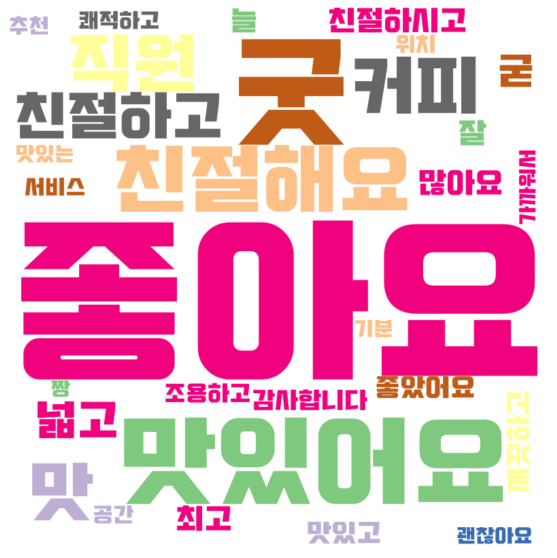

In [ ]:
# 워드 클라우드 Top30
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import nltk 
from nltk.corpus import stopwords
import matplotlib 
from matplotlib import rc
from wordcloud import WordCloud

%matplotlib inline 
rc('font', family='NanumBarunGothic')

#wordcloud의 세부 내용을 구성 
wordcloud = WordCloud(
    font_path = './font/TYPO_SSANGMUNDONGB.TTF',  
    background_color='white',                        
    colormap = 'Accent_r',                               
    width = 800,
    height = 800,
    max_words = 30,
    max_font_size = 300,
)

wordcloud_words = wordcloud.generate_from_frequencies(token)

array = wordcloud.to_array()
fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()
fig.savefig('worldcloud_starbucks.png')

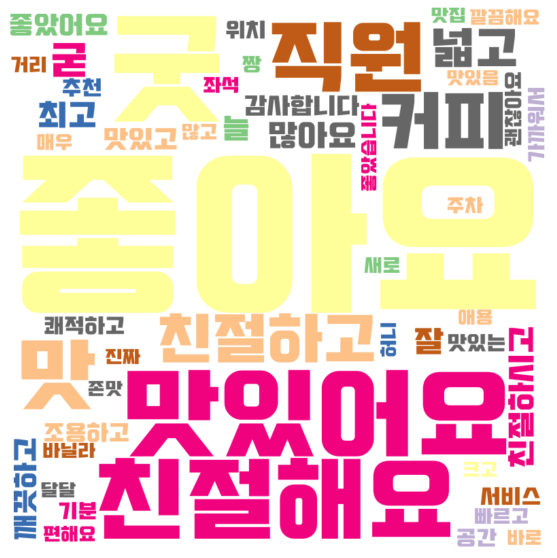

In [ ]:
# 워드 클라우드 Top50
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import nltk 
from nltk.corpus import stopwords
import matplotlib 
from matplotlib import rc
from wordcloud import WordCloud

%matplotlib inline 
rc('font', family='NanumBarunGothic')

#wordcloud의 세부 내용을 구성 
wordcloud = WordCloud(
    font_path = './font/TYPO_SSANGMUNDONGB.TTF',  
    background_color='white',                        
    colormap = 'Accent_r',                               
    width = 800,
    height = 800,
    max_words = 50,
    max_font_size = 300,
)

wordcloud_words = wordcloud.generate_from_frequencies(token)

array = wordcloud.to_array()
fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()
fig.savefig('worldcloud_starbucks.png')

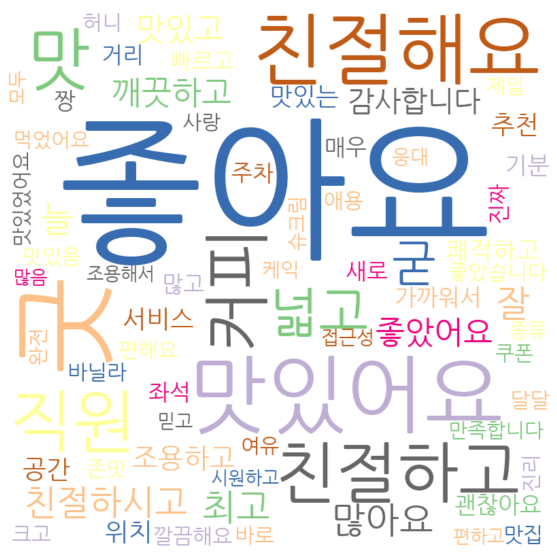

In [ ]:
# 워드 클라우드 Top70
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import nltk 
from nltk.corpus import stopwords
import matplotlib 
from matplotlib import rc
from wordcloud import WordCloud

%matplotlib inline 
rc('font', family='NanumBarunGothic')

#wordcloud의 세부 내용을 구성 
wordcloud = WordCloud(
    font_path = 'D:/글씨체/NanumGothic.ttf',  
    background_color='white',                        
    colormap = 'Accent_r',     
    max_words = 70,                          
    width = 800,
    height = 800
)

wordcloud_words = wordcloud.generate_from_frequencies(token)

array = wordcloud.to_array()
fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()
fig.savefig('worldcloud_starbucks.png')

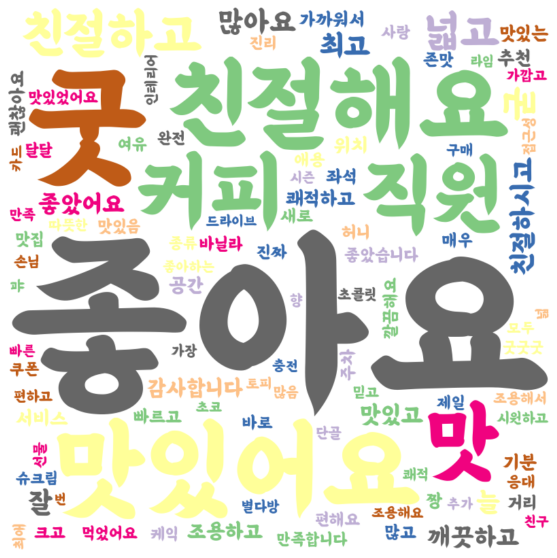

In [ ]:
# 워드 클라우드 Top100
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import nltk 
from nltk.corpus import stopwords
import matplotlib 
from matplotlib import rc
from wordcloud import WordCloud

%matplotlib inline 
rc('font', family='NanumBarunGothic')

#wordcloud의 세부 내용을 구성 
wordcloud = WordCloud(
    font_path = './font/BMEULJIROTTF_0.TTF',  
    background_color='white',                        
    colormap = 'Accent_r',                               
    width = 800,
    height = 800,
    max_words = 100,
    max_font_size = 300,
)

wordcloud_words = wordcloud.generate_from_frequencies(token)

array = wordcloud.to_array()
fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()
fig.savefig('worldcloud_starbucks.png')